In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로딩

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/galaxy.csv")
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


# 전처리

In [4]:
data.isna().sum() / len(data) * 100

BuyItNow                 0.000000
startprice               0.000000
carrier                 78.720539
color                   39.932660
productline              0.000000
noDescription            0.000000
charCountDescription     0.000000
upperCaseDescription     0.000000
sold                     0.000000
dtype: float64

In [5]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


In [6]:
data['carrier'].unique()

array([nan, 'AT&T', 'Sprint/T-Mobile', 'Verizon'], dtype=object)

In [7]:
data['carrier'].value_counts()

carrier
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: count, dtype: int64

In [8]:
data.groupby('carrier')['sold'].value_counts(sort=False)

carrier          sold
AT&T             0       101
                 1        76
Sprint/T-Mobile  0        28
                 1        24
Verizon          0        41
                 1        46
Name: count, dtype: int64

In [9]:
print("AT&T", 76 / (76+101))
print("Sprint/T-Mobile ", 24 / (24+28))
print("Verizon", 46 / (46+41))

AT&T 0.4293785310734463
Sprint/T-Mobile  0.46153846153846156
Verizon 0.5287356321839081


통신사는 판매에 큰 영향을 미치지 않는 것으로 판단되고 너무 많은 결측이 있어 삭제예정

In [10]:
data['color'].unique()

array(['White', nan, 'Space Gray', 'Midnight Black', 'Aura Black', 'Gold',
       'Black', 'Prism Black'], dtype=object)

In [11]:
data['color'].value_counts()

color
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

기종별로 색상 최빈값을 구해서 color nan값을 대치 

In [12]:
color_by_product = data.groupby('productline')['color'].value_counts()
color_by_product

productline    color         
Galaxy_Note10  Space Gray         91
               White              76
               Gold               46
               Aura Black         19
Galaxy_Note8   Midnight Black     58
               White              44
               Space Gray          2
               Gold                1
Galaxy_Note9   White              37
               Space Gray         27
               Black              10
Galaxy_S10     White               5
               Gold                1
               Prism Black         1
               Space Gray          1
Galaxy_S7      Midnight Black    111
               White              21
               Space Gray          3
Galaxy_S8      Midnight Black     59
               White              55
               Space Gray         38
Galaxy_S9      White              51
               Midnight Black     46
               Space Gray          1
Unknown        White              39
               Black              28
        

In [13]:
data.loc[data['productline'] == 'Galaxy_Note9', 'startprice'].describe() 

count    107.000000
mean     254.561402
std      126.208902
min        0.010000
25%      177.500000
50%      259.950000
75%      349.990000
max      575.000000
Name: startprice, dtype: float64

In [14]:
data.loc[(data['productline'] == 'Unknown') & (data['color'] == 'Black'), 'startprice'].describe() 

count     28.000000
mean     134.785714
std      134.173500
min        0.990000
25%       15.000000
50%       99.995000
75%      202.492500
max      473.600000
Name: startprice, dtype: float64

In [15]:
color_by_product

productline    color         
Galaxy_Note10  Space Gray         91
               White              76
               Gold               46
               Aura Black         19
Galaxy_Note8   Midnight Black     58
               White              44
               Space Gray          2
               Gold                1
Galaxy_Note9   White              37
               Space Gray         27
               Black              10
Galaxy_S10     White               5
               Gold                1
               Prism Black         1
               Space Gray          1
Galaxy_S7      Midnight Black    111
               White              21
               Space Gray          3
Galaxy_S8      Midnight Black     59
               White              55
               Space Gray         38
Galaxy_S9      White              51
               Midnight Black     46
               Space Gray          1
Unknown        White              39
               Black              28
        

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 1056 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [33]:
color_by_product.index

MultiIndex([('Galaxy_Note10',     'Space Gray'),
            ('Galaxy_Note10',          'White'),
            ('Galaxy_Note10',           'Gold'),
            ('Galaxy_Note10',     'Aura Black'),
            ( 'Galaxy_Note8', 'Midnight Black'),
            ( 'Galaxy_Note8',          'White'),
            ( 'Galaxy_Note8',     'Space Gray'),
            ( 'Galaxy_Note8',           'Gold'),
            ( 'Galaxy_Note9',          'White'),
            ( 'Galaxy_Note9',     'Space Gray'),
            ( 'Galaxy_Note9',          'Black'),
            (   'Galaxy_S10',          'White'),
            (   'Galaxy_S10',           'Gold'),
            (   'Galaxy_S10',    'Prism Black'),
            (   'Galaxy_S10',     'Space Gray'),
            (    'Galaxy_S7', 'Midnight Black'),
            (    'Galaxy_S7',          'White'),
            (    'Galaxy_S7',     'Space Gray'),
            (    'Galaxy_S8', 'Midnight Black'),
            (    'Galaxy_S8',          'White'),
            (    'Ga

In [28]:
color_by_product.index
colors = [('Galaxy_Note10', 'Space Gray'), ('Galaxy_Note8','Midnight Black'), ('Galaxy_Note9','White'), 
  ('Galaxy_S10', 'White'), ('Galaxy_S7', 'Midnight Black'), ('Galaxy_S8', 'Midnight Black'),
('Galaxy_S9','White'), ('Unknown','White')]

# EDA

In [35]:
for product, color in colors:
#     print(product, color)
    data.loc[(data['color'].isna() == True) & (data['productline'] == product), 'color'] = color
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [37]:
data.groupby('color')['sold'].value_counts(sort=False)

color           sold
Aura Black      0        13
                1         6
Black           0        22
                1        16
Gold            0        34
                1        18
Midnight Black  0       257
                1       282
Prism Black     0         1
Space Gray      0       165
                1       134
White           0       307
                1       230
Name: count, dtype: int64

In [38]:
data['sold'].value_counts()

sold
0    799
1    686
Name: count, dtype: int64

컬러가 판매에 큰 영향을 주는 것 같지 않음

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 1056 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [39]:
data['color'].unique()

array(['White', 'Space Gray', 'Midnight Black', 'Aura Black', 'Gold',
       'Black', 'Prism Black'], dtype=object)

In [41]:
for x in list(data['color'].unique()):
    if "Black" in x:
        print('Black')
    else:
        print(i)
    

White
Space Gray
Black
Black
Gold
Black
Black


In [43]:
data['color'] = data['color'].apply(lambda x: 'Black' if "Black" in x else x)

In [44]:
data['color'].value_counts()

color
Black         597
White         537
Space Gray    299
Gold           52
Name: count, dtype: int64

In [ ]:
data_no_color = data.copy()

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [48]:
data['startprice'].describe()

count    1485.000000
mean      216.844162
std       172.893308
min         0.010000
25%        80.000000
50%       198.000000
75%       310.000000
max       999.000000
Name: startprice, dtype: float64

In [50]:
print("정상범위 최대값", 310 + (1.5 * (310.000000 - 80.000000)))

정상범위 최대값 655.0


<Axes: xlabel='startprice', ylabel='Count'>

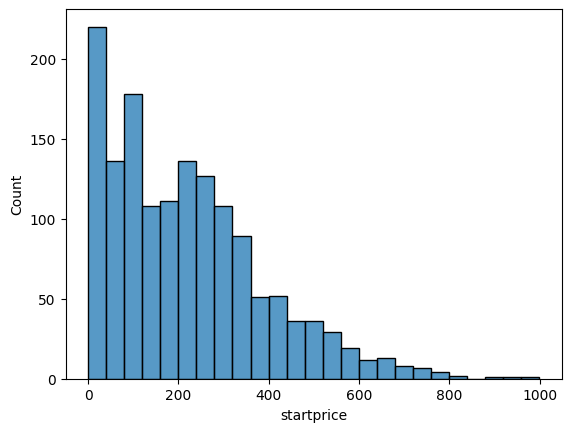

In [47]:
sns.histplot(data['startprice'])

In [51]:
data[data['startprice'] > 655.0]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
468,0,699.95,NaN,Black,Galaxy_Note8,no description,83,3,0
505,0,785.00,Sprint/T-Mobile,Gold,Galaxy_Note10,contains description,0,0,0
617,1,800.00,NaN,Gold,Galaxy_Note10,contains description,0,0,0
703,0,795.99,AT&T,Space Gray,Galaxy_Note10,contains description,0,0,0
714,0,660.00,NaN,White,Galaxy_Note10,contains description,0,0,0
730,0,675.00,NaN,White,Galaxy_Note10,contains description,0,0,1
742,0,829.99,NaN,Gold,Galaxy_Note10,contains description,0,0,0
766,0,900.00,NaN,Space Gray,Galaxy_Note10,contains description,0,0,0
791,0,720.12,AT&T,Black,Galaxy_S8,contains description,0,0,0
801,0,699.00,NaN,Space Gray,Galaxy_Note10,no description,12,0,0


In [53]:
meanbyproduct = data.groupby('productline')['startprice'].describe()
meanbyproduct

,count,mean,std,min,25%,50%,75%,max
productline,,,,,,,,
Galaxy_Note10,351.0,366.931311,198.259953,0.99,250.0000,380.000,499.9700,939.00
Galaxy_Note8,153.0,176.065033,122.104147,0.01,99.0000,187.500,239.8800,699.95
Galaxy_Note9,107.0,254.561402,126.208902,0.01,177.5000,259.950,349.9900,575.00
Galaxy_S10,8.0,294.583750,79.754787,160.00,246.2500,301.335,341.7500,420.00
Galaxy_S7,227.0,84.190000,66.527227,0.01,48.7450,79.000,104.9900,499.00
Galaxy_S8,277.0,165.883321,123.743959,0.01,89.9900,155.000,230.0000,999.00
Galaxy_S9,158.0,231.268101,136.186507,0.01,145.8700,249.970,300.0000,695.00
Unknown,204.0,171.994265,156.092171,0.99,44.9975,149.990,259.9925,700.00


In [55]:
meanbyproduct.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [60]:
meanbyproduct['maxpirce'] = meanbyproduct.apply(lambda x: x['75%'] + (1.5*(x['75%'] - x['25%'])), axis=1)
meanbyproduct

,count,mean,std,min,25%,50%,75%,max,maxpirce
productline,,,,,,,,,
Galaxy_Note10,351.0,366.931311,198.259953,0.99,250.0000,380.000,499.9700,939.00,874.9250
Galaxy_Note8,153.0,176.065033,122.104147,0.01,99.0000,187.500,239.8800,699.95,451.2000
Galaxy_Note9,107.0,254.561402,126.208902,0.01,177.5000,259.950,349.9900,575.00,608.7250
Galaxy_S10,8.0,294.583750,79.754787,160.00,246.2500,301.335,341.7500,420.00,485.0000
Galaxy_S7,227.0,84.190000,66.527227,0.01,48.7450,79.000,104.9900,499.00,189.3575
Galaxy_S8,277.0,165.883321,123.743959,0.01,89.9900,155.000,230.0000,999.00,440.0150
Galaxy_S9,158.0,231.268101,136.186507,0.01,145.8700,249.970,300.0000,695.00,531.1950
Unknown,204.0,171.994265,156.092171,0.99,44.9975,149.990,259.9925,700.00,582.4850


In [128]:
for index, item in meanbyproduct[['maxpirce']].iterrows():
    print(index, item.values[0])
    display(data[(data['productline'] == index) & (data['startprice'] > item.values[0])])
    

Galaxy_Note10 874.9250000000001


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
766,0,900.0,NaN,Space Gray,Galaxy_Note10,contains description,0,0,0
1002,0,939.0,NaN,Gold,Galaxy_Note10,contains description,0,0,0


Galaxy_Note8 451.2


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
468,0,699.95,NaN,Black,Galaxy_Note8,no description,83,3,0
701,0,463.26,AT&T,White,Galaxy_Note8,no description,99,2,0
901,0,600.00,AT&T,Black,Galaxy_Note8,no description,30,1,0
938,0,649.99,NaN,Black,Galaxy_Note8,contains description,0,0,0


Galaxy_Note9 608.725


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold


Galaxy_S10 485.0


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold


Galaxy_S7 189.35749999999996


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
36,0,289.95,NaN,Black,Galaxy_S7,contains description,0,0,0
50,0,269.99,NaN,Black,Galaxy_S7,contains description,0,0,0
86,0,279.95,NaN,Black,Galaxy_S7,contains description,0,0,0
139,0,279.95,NaN,Black,Galaxy_S7,contains description,0,0,0
205,1,229.97,AT&T,Black,Galaxy_S7,contains description,0,0,0
363,0,229.99,Verizon,Space Gray,Galaxy_S7,contains description,0,0,1
460,0,198.00,Verizon,White,Galaxy_S7,no description,99,4,0
669,0,200.00,NaN,Black,Galaxy_S7,contains description,0,0,0
750,1,499.00,NaN,Black,Galaxy_S7,contains description,0,0,0
774,0,227.00,AT&T,White,Galaxy_S7,no description,98,2,0


Galaxy_S8 440.015


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
207,0,499.99,AT&T,Space Gray,Galaxy_S8,contains description,0,0,0
791,0,720.12,AT&T,Black,Galaxy_S8,contains description,0,0,0
1102,0,999.00,NaN,Black,Galaxy_S8,contains description,0,0,0


Galaxy_S9 531.1949999999999


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
660,0,649.99,Verizon,Black,Galaxy_S9,contains description,0,0,0
1005,0,544.49,NaN,Black,Galaxy_S9,no description,90,5,0
1015,0,540.00,Verizon,White,Galaxy_S9,no description,36,22,0
1084,0,573.74,NaN,White,Galaxy_S9,contains description,0,0,0
1116,0,695.00,AT&T,White,Galaxy_S9,contains description,0,0,0


Unknown 582.485


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1069,0,595.00,NaN,White,Unknown,contains description,0,0,1
1121,1,700.00,NaN,White,Unknown,contains description,0,0,0
1125,0,700.00,NaN,White,Unknown,contains description,0,0,0
1127,0,599.00,NaN,White,Unknown,contains description,0,0,0
1175,1,599.99,NaN,White,Unknown,contains description,0,0,0
1349,0,590.00,NaN,White,Unknown,contains description,0,0,1


In [129]:
meanbyproduct['maxpirce'].index

Index(['Galaxy_Note10', 'Galaxy_Note8', 'Galaxy_Note9', 'Galaxy_S10',
       'Galaxy_S7', 'Galaxy_S8', 'Galaxy_S9', 'Unknown'],
      dtype='object', name='productline')

In [130]:
for idx, item in zip(meanbyproduct['maxpirce'].index, meanbyproduct['maxpirce']):
    print(idx)
    print(item)
    display(data[(data['productline'] == idx) & (data['startprice'] > item)])

Galaxy_Note10
874.9250000000001


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
766,0,900.0,NaN,Space Gray,Galaxy_Note10,contains description,0,0,0
1002,0,939.0,NaN,Gold,Galaxy_Note10,contains description,0,0,0


Galaxy_Note8
451.2


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
468,0,699.95,NaN,Black,Galaxy_Note8,no description,83,3,0
701,0,463.26,AT&T,White,Galaxy_Note8,no description,99,2,0
901,0,600.00,AT&T,Black,Galaxy_Note8,no description,30,1,0
938,0,649.99,NaN,Black,Galaxy_Note8,contains description,0,0,0


Galaxy_Note9
608.725


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold


Galaxy_S10
485.0


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold


Galaxy_S7
189.35749999999996


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
36,0,289.95,NaN,Black,Galaxy_S7,contains description,0,0,0
50,0,269.99,NaN,Black,Galaxy_S7,contains description,0,0,0
86,0,279.95,NaN,Black,Galaxy_S7,contains description,0,0,0
139,0,279.95,NaN,Black,Galaxy_S7,contains description,0,0,0
205,1,229.97,AT&T,Black,Galaxy_S7,contains description,0,0,0
363,0,229.99,Verizon,Space Gray,Galaxy_S7,contains description,0,0,1
460,0,198.00,Verizon,White,Galaxy_S7,no description,99,4,0
669,0,200.00,NaN,Black,Galaxy_S7,contains description,0,0,0
750,1,499.00,NaN,Black,Galaxy_S7,contains description,0,0,0
774,0,227.00,AT&T,White,Galaxy_S7,no description,98,2,0


Galaxy_S8
440.015


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
207,0,499.99,AT&T,Space Gray,Galaxy_S8,contains description,0,0,0
791,0,720.12,AT&T,Black,Galaxy_S8,contains description,0,0,0
1102,0,999.00,NaN,Black,Galaxy_S8,contains description,0,0,0


Galaxy_S9
531.1949999999999


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
660,0,649.99,Verizon,Black,Galaxy_S9,contains description,0,0,0
1005,0,544.49,NaN,Black,Galaxy_S9,no description,90,5,0
1015,0,540.00,Verizon,White,Galaxy_S9,no description,36,22,0
1084,0,573.74,NaN,White,Galaxy_S9,contains description,0,0,0
1116,0,695.00,AT&T,White,Galaxy_S9,contains description,0,0,0


Unknown
582.485


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1069,0,595.00,NaN,White,Unknown,contains description,0,0,1
1121,1,700.00,NaN,White,Unknown,contains description,0,0,0
1125,0,700.00,NaN,White,Unknown,contains description,0,0,0
1127,0,599.00,NaN,White,Unknown,contains description,0,0,0
1175,1,599.99,NaN,White,Unknown,contains description,0,0,0
1349,0,590.00,NaN,White,Unknown,contains description,0,0,1


In [131]:
data['color'].value_counts()

color
Black         597
White         537
Space Gray    299
Gold           52
Name: count, dtype: int64

<Axes: xlabel='color'>

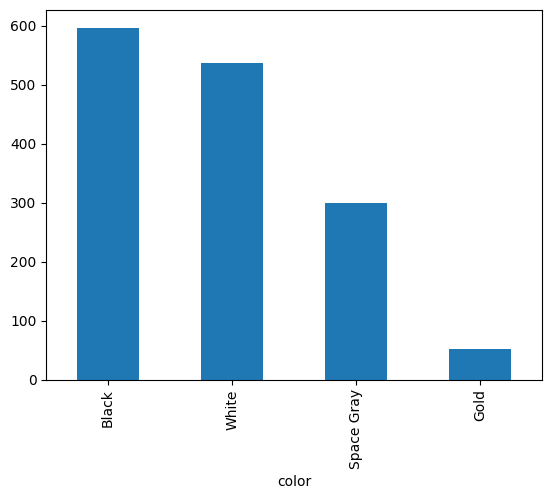

In [132]:
data['color'].value_counts().plot(kind='bar')

In [133]:
data.groupby('color')['sold'].value_counts(sort=False)

color       sold
Black       0       293
            1       304
Gold        0        34
            1        18
Space Gray  0       165
            1       134
White       0       307
            1       230
Name: count, dtype: int64

컬러는 구매에 큰 영향이 없다.

In [134]:
data['productline'].value_counts()

productline
Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: count, dtype: int64

<Axes: xlabel='productline'>

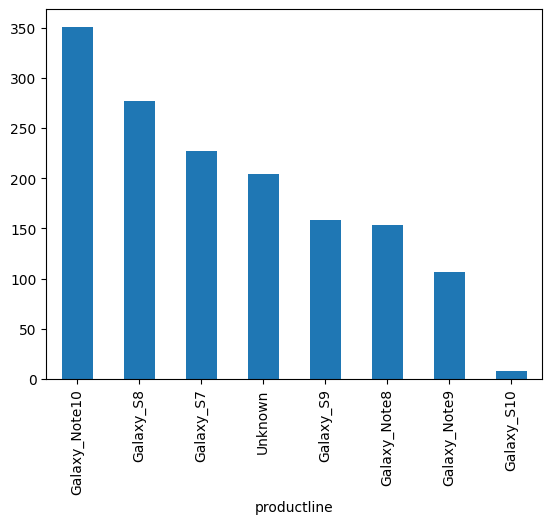

In [135]:
data['productline'].value_counts().plot(kind='bar')

In [136]:
data.groupby('productline')['sold'].value_counts(sort=False)

productline    sold
Galaxy_Note10  0       202
               1       149
Galaxy_Note8   0        73
               1        80
Galaxy_Note9   0        58
               1        49
Galaxy_S10     0         4
               1         4
Galaxy_S7      0       102
               1       125
Galaxy_S8      0       145
               1       132
Galaxy_S9      0        93
               1        65
Unknown        0       122
               1        82
Name: count, dtype: int64

기종에 따라서 판매량이 크게 달라지지 않는다.

In [137]:
data['noDescription'].value_counts()

noDescription
contains description    856
no description          629
Name: count, dtype: int64

In [138]:
def reverse_value(x):
    if x == 'contains description':
        return 'no description'
    elif x == 'no description':
        return 'contains description'

In [140]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,White,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,White,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1


In [141]:
data['noDescription'] = data['noDescription'].apply(reverse_value)
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,no description,0,0,1
1,0,235.00,NaN,White,Galaxy_Note9,no description,0,0,0
2,0,199.99,NaN,White,Unknown,contains description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,no description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,no description,0,0,1


In [142]:
data.groupby('noDescription')['sold'].value_counts()

noDescription         sold
contains description  0       356
                      1       273
no description        0       443
                      1       413
Name: count, dtype: int64

noDescription 도 판매와는 관계가 없다.

<Axes: xlabel='charCountDescription', ylabel='Count'>

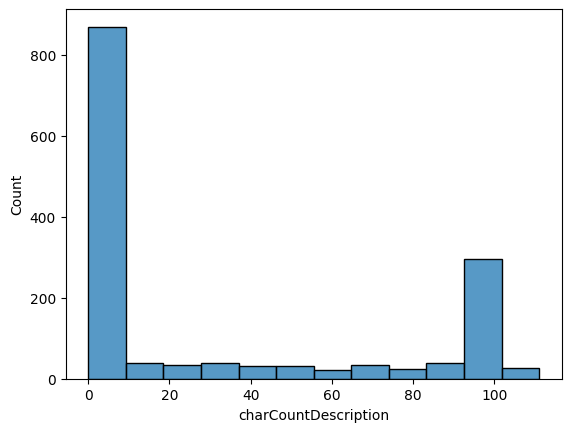

In [144]:
sns.histplot(data['charCountDescription'])

In [145]:
data['charCountDescription'].describe()

count    1485.000000
mean       31.184512
std        41.744518
min         0.000000
25%         0.000000
50%         0.000000
75%        79.000000
max       111.000000
Name: charCountDescription, dtype: float64

In [148]:
data[data['charCountDescription'] > 0]['sold'].value_counts()

sold
0    356
1    273
Name: count, dtype: int64

charCountDescription 의 글자수도 판매와는 관련이 없다.

<Axes: xlabel='upperCaseDescription', ylabel='Count'>

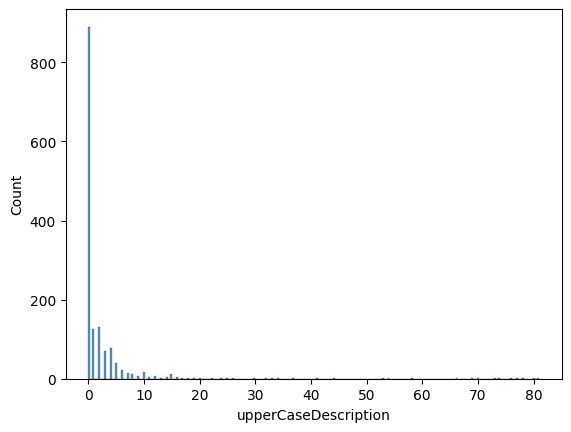

In [150]:
sns.histplot(data['upperCaseDescription'])

In [154]:
data[data['upperCaseDescription'] > 0]['sold'].value_counts()

sold
0    343
1    252
Name: count, dtype: int64

upperCaseDescription 판매에 영향이 없다.

In [156]:
data['BuyItNow'].value_counts()

BuyItNow
0    818
1    667
Name: count, dtype: int64

In [158]:
data.groupby('BuyItNow')['sold'].value_counts(sort=False)

BuyItNow  sold
0         0       639
          1       179
1         0       160
          1       507
Name: count, dtype: int64

In [160]:
print("BuyItNow0일때", 179 / (179+639))
print("BuyItNow1일때", 507 / (507+160))

BuyItNow0일때 0.21882640586797067
BuyItNow1일때 0.760119940029985


BuyItNow 가 1일 때 판매량이 높다.

# Feature Engineering

In [161]:
data.head(2)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,no description,0,0,1
1,0,235.00,NaN,White,Galaxy_Note9,no description,0,0,0


carrier, noDescription	charCountDescription	upperCaseDescription 는 삭제

In [162]:
data = data.drop(['carrier', 'noDescription', 'charCountDescription', 'upperCaseDescription'], axis=1)

In [163]:
data.head()

,BuyItNow,startprice,color,productline,sold
0,0,199.99,White,Galaxy_S9,1
1,0,235.00,White,Galaxy_Note9,0
2,0,199.99,White,Unknown,0
3,1,175.00,Space Gray,Galaxy_Note9,1
4,1,100.00,Space Gray,Galaxy_S8,1


In [166]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,BuyItNow,startprice,sold,color_Gold,color_Space Gray,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown
0,0,199.99,1,False,False,True,False,False,False,False,False,True,False
1,0,235.00,0,False,False,True,False,True,False,False,False,False,False
2,0,199.99,0,False,False,True,False,False,False,False,False,False,True
3,1,175.00,1,False,True,False,False,True,False,False,False,False,False
4,1,100.00,1,False,True,False,False,False,False,False,True,False,False


# 데이터 분리 및 분석

In [167]:
X = data.drop('sold', axis=1)
y = data['sold']

In [168]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [175]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [178]:
dtc = DecisionTreeClassifier(max_depth= 9, random_state=7)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print("accuracy_score", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

accuracy_score 0.7912457912457912
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       158
           1       0.80      0.74      0.77       139

    accuracy                           0.79       297
   macro avg       0.79      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



In [177]:
for i in range(1, 30):
    dtc = DecisionTreeClassifier(max_depth= i, random_state=7)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, "accuracy_score", accuracy_score(y_test, pred))
    print(i, classification_report(y_test, pred))

1 accuracy_score 0.7811447811447811
1               precision    recall  f1-score   support

           0       0.80      0.79      0.79       158
           1       0.76      0.77      0.77       139

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297

2 accuracy_score 0.7811447811447811
2               precision    recall  f1-score   support

           0       0.80      0.79      0.79       158
           1       0.76      0.77      0.77       139

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297

3 accuracy_score 0.7777777777777778
3               precision    recall  f1-score   support

           0       0.74      0.90      0.81       158
           1       0.85      0.64      0.73       139

    accuracy                           0.78       297
   macro avg  

24               precision    recall  f1-score   support

           0       0.76      0.78      0.77       158
           1       0.74      0.72      0.73       139

    accuracy                           0.75       297
   macro avg       0.75      0.75      0.75       297
weighted avg       0.75      0.75      0.75       297

25 accuracy_score 0.7508417508417509
25               precision    recall  f1-score   support

           0       0.76      0.78      0.77       158
           1       0.74      0.72      0.73       139

    accuracy                           0.75       297
   macro avg       0.75      0.75      0.75       297
weighted avg       0.75      0.75      0.75       297

26 accuracy_score 0.7508417508417509
26               precision    recall  f1-score   support

           0       0.76      0.78      0.77       158
           1       0.74      0.72      0.73       139

    accuracy                           0.75       297
   macro avg       0.75      0.75      0.75  

# 성능 평가 및 성능 개선을 위한 튜닝